In [ ]:
!pip install QuantLib

# **Importing the Data**

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/options/option_tick_processed_20121031.txt
/kaggle/input/options1/option_tick_processed_20121010.txt/option_tick_processed_20121010.txt
/kaggle/input/options1/option_tick_processed_20121003.txt/option_tick_processed_20121003.txt
/kaggle/input/aapl-options-data/options-data - option_tick_processed_20121005.csv
/kaggle/input/options-2/option_tick_processed_20121011.txt/option_tick_processed_20121011.txt
/kaggle/input/options-2/option_tick_processed_20121004.txt/option_tick_processed_20121004.txt
/kaggle/input/options-2/option_tick_processed_20121001.txt/option_tick_processed_20121001.txt
/kaggle/input/options-2/option_tick_processed_20121024.txt/option_tick_processed_20121024.txt


# **Importing Dependencies and Libraries**

In [15]:
import pandas as pd
import datetime as dt
from pandas_datareader.yahoo.options import Options as YahooOptions
import time
from scipy.interpolate import interp1d
import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU
from keras import backend
import tensorflow as tf
from statistics import mean
from math import sqrt,pi,log
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot 
import math
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from scipy.interpolate import make_interp_spline, BSpline
from scipy.integrate import simps, cumtrapz, romb
import QuantLib as ql

ModuleNotFoundError: No module named 'QuantLib'

In [6]:
options_table = pd.read_csv('/kaggle/input/aapl-options-data/options-data - option_tick_processed_20121005.csv')
options_table1 = pd.read_csv('/kaggle/input/options/option_tick_processed_20121031.txt', sep="	")
options_table2 = pd.read_csv('/kaggle/input/options1/option_tick_processed_20121010.txt/option_tick_processed_20121010.txt', sep="	")
options_table3 = pd.read_csv('/kaggle/input/options1/option_tick_processed_20121003.txt/option_tick_processed_20121003.txt', sep="	")
options_table4 = pd.read_csv('/kaggle/input/options-2/option_tick_processed_20121011.txt/option_tick_processed_20121011.txt', sep="	")
options_table5 = pd.read_csv('/kaggle/input/options-2/option_tick_processed_20121004.txt/option_tick_processed_20121004.txt', sep="	")
options_table6 = pd.read_csv('/kaggle/input/options-2/option_tick_processed_20121001.txt/option_tick_processed_20121001.txt', sep="	")
options_table7 = pd.read_csv('/kaggle/input/options-2/option_tick_processed_20121024.txt/option_tick_processed_20121024.txt', sep="	")

In [7]:
options_table01 = options_table.append(options_table1, ignore_index = True)
options_table02 = options_table01.append(options_table2, ignore_index = True)
options_table03 = options_table02.append(options_table3, ignore_index = True)
options_table04 = options_table03.append(options_table4, ignore_index = True)
options_table05 = options_table04.append(options_table5, ignore_index = True)
options_table06 = options_table05.append(options_table6, ignore_index = True)
options_table = options_table06.append(options_table7, ignore_index = True)

In [8]:
options_table.drop_duplicates(inplace = True)

# **Initial Data Description**

In [9]:
options_table.info()
options_table.head()
print(len(options_table))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553754 entries, 0 to 553753
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TimeStamp       553754 non-null  object 
 1   Last            553754 non-null  float64
 2   LastSize        553754 non-null  int64  
 3   TotalVolume     553754 non-null  int64  
 4   Bid             553754 non-null  float64
 5   Ask             553754 non-null  float64
 6   TickID          553754 non-null  int64  
 7   BidSize         553754 non-null  int64  
 8   AskSize         553754 non-null  int64  
 9   BasisForLast    553754 non-null  object 
 10  Position        553754 non-null  object 
 11  Option          553754 non-null  object 
 12  OptionType      553754 non-null  object 
 13  ExpirationDate  553754 non-null  object 
 14  DaysToExpire    553754 non-null  int64  
 15  OptionStrike    553754 non-null  int64  
 16  InterestRate    553754 non-null  float64
 17  StockLast 

# Data Cleaning

In [10]:
P_options_index = options_table[options_table['OptionType'] == 'P'].index
options_table= options_table.drop(P_options_index)

options_table.head(1)

options_table.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 346227 entries, 0 to 532380
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TimeStamp       346227 non-null  object 
 1   Last            346227 non-null  float64
 2   LastSize        346227 non-null  int64  
 3   TotalVolume     346227 non-null  int64  
 4   Bid             346227 non-null  float64
 5   Ask             346227 non-null  float64
 6   TickID          346227 non-null  int64  
 7   BidSize         346227 non-null  int64  
 8   AskSize         346227 non-null  int64  
 9   BasisForLast    346227 non-null  object 
 10  Position        346227 non-null  object 
 11  Option          346227 non-null  object 
 12  OptionType      346227 non-null  object 
 13  ExpirationDate  346227 non-null  object 
 14  DaysToExpire    346227 non-null  int64  
 15  OptionStrike    346227 non-null  int64  
 16  InterestRate    346227 non-null  float64
 17  StockLast 

# Black Scholes Calculations

In [22]:
def call_payoff(S , K):
    return np.maximum(S-K, 0)
def N(x):
    return norm.cdf(x)

def bs_C_value(S,K,r,t,v):
    d1 = (1.0/(v * np.sqrt(t))) * (np.log(S/K) + (r + 0.5 * v**2.0) * t)
    d2 = d1 - (v * np.sqrt(t))
    return N(d1) * S - N(d2) * K * np.exp(-r * t)

def bs_P_value(S,K,r,t,v):
    d1 = (1.0/(v * np.sqrt(t))) * (np.log(S/K) + (r + 0.5 * v**2.0) * t)
    d2 = d1 - (v * np.sqrt(t))
    return  N(-d2) * K * np.exp(-r * t) - N(-d1) * S 

def call_iv_char(S,K,r,t,v,call_price):
    return call_price - bs_C_value(S,K,r,t,v)

def put_iv_char(S,K,r,t,v,put_price):
    return put_price - bs_P_value(S,K,r,t,v)

def C_iv(S,K,r,t,call_price, a = -2.0, b = 2.0, tol = 1e-6):
    S_1 = S
    K_1 = K
    r_1 = r
    t_1 = t
    call_price_1 = call_price

    def fun(v):
        return call_iv_char(S_1,K_1,r_1,t_1,v,call_price_1)
    try:
        res = brentq(fun, a = a, b = b, xtol = tol)
        return np.nan if res <=1.0e-6 else res
    except ValueError:
        return np.nan
def P_iv(S,K,r,t,put_price, a = -2.0, b = 2.0, tol = 1e-6):
    S_1 = S
    K_1 = K
    r_1 = r
    t_1 = t
    put_price_1 = put_price

    def fun(v):
        return put_iv_char(S_1,K_1,r_1,t_1,v,put_price_1)
    try:
        res = brentq(fun, a = a, b = b, xtol = tol)
        return np.nan if res <=1.0e-6 else res
    except ValueError:
        return np.nan
def getput(x):
    S = x['StockLast']
    K = x['OptionStrike']
    r = x['Risk_free_Rate']
    t = x['Years_to_Expiry']
    mid = x['Mid']
    return P_iv(S, K, r, t, mid)
    
def getting_iv(x):
    option_type = x['OptionType']
    S = x['StockLast']
    K = x['OptionStrike']
    r = x['Risk_free_Rate']
    t = x['Years_to_Expiry']
    mid = x['Mid']
    meth = '{0}_iv'.format(option_type)
    return float(globals().get(meth)(S, K, r, t, mid))
    
    
def func(x):
    return np.exp( -0.5 * x * x)/ (sqrt(2.0 * pi))
def get_c_delta(x):
    S = x['StockLast']
    K = x['OptionStrike']
    r = x['Risk_free_Rate']
    t = x['Years_to_Expiry']
    vol = x['Imp_Vol']
    d1 = (1.0/(vol * np.sqrt(t))) * (np.log(S/K) + (r + 0.5 * vol**2.0) * t)
    return N(d1)
def get_gamma(x):
    S = x['StockLast']
    K = x['OptionStrike']
    r = x['Risk_free_Rate']
    t = x['Years_to_Expiry']
    vol = x['Imp_Vol']
    d1 = (1.0/(vol * np.sqrt(t))) * (np.log(S/K) + (r + 0.5 * vol**2.0) * t) 
    return func(d1) / (S * vol * sqrt(t))
def get_vega(x):
    S = x['StockLast']
    K = x['OptionStrike']
    r = x['Risk_free_Rate']
    t = x['Years_to_Expiry']
    vol = x['Imp_Vol']
    d1 = (1.0/(vol * np.sqrt(t))) * (np.log(S/K) + (r + 0.5 * vol**2.0) * t)
    
    return (S * func(d1) * sqrt(t)) / 100.0
def get_c_rho(x):
    S = x['StockLast']
    K = x['OptionStrike']
    r = x['Risk_free_Rate']
    t = x['Years_to_Expiry']
    vol = x['Imp_Vol']
    d1 = (1.0/(vol * np.sqrt(t))) * (np.log(S/K) + (r + 0.5 * vol**2.0) * t)
    d2 = d1 - (vol * np.sqrt(t))
    rho = K * t * np.exp(-r * t) * N(d2)
    return rho / 100.0
def get_c_theta(x):
    S = x['StockLast']
    K = x['OptionStrike']
    r = x['Risk_free_Rate']
    t = x['Years_to_Expiry']
    vol = x['Imp_Vol']
    d1 = (1.0/(vol * np.sqrt(t))) * (np.log(S/K) + (r + 0.5 * vol**2.0) * t)
    d2 = d1 - (vol * np.sqrt(t))
    theta = -((S * func(d1) * vol) / (2.0 * np.sqrt(t))) + (r * K * np.exp(-r * t) * N(-d2))
    return theta / 365.0
def option_moneyness(x):
    S = x['StockLast']
    K = x['OptionStrike']
    return K/S
def log_options_moneyness(x):
    S = x['StockLast']
    K = x['OptionStrike']
    return log(S/K)
def std_moneyness(x):
    S = x['StockLast']
    d = x['Imp_Vol']
    K = x['OptionStrike']
    t = x['Years_to_Expiry']
    m = log(S/K)/(d* sqrt(t))
    return m



# Preprocessing

In [17]:
#date formatting
def days_till_exp(x):
    exp = x['ExpirationDate']
    date_str = datetime.strptime(exp,'%Y-%m-%d %H:%M:%S')
    time_of_capture = x['TimeStamp']
    time_of_c = datetime.strptime(time_of_capture,'%Y-%m-%d-%H:%M:%S')
    return (date_str - time_of_c).days + 1
def years_till_exp(x):
    exp = x['ExpirationDate']
    date_str = time.strptime(exp,'%Y-%m-%d %H:%M:%S')
    number_of_seconds = time.mktime(date_str)
    time_of_capture = x['TimeStamp']
    time_of_c = datetime.strptime(time_of_capture,'%Y-%m-%d-%H:%M:%S')
    
    seconds_now = time_of_c.timestamp()
    sec_untill_exp = number_of_seconds - seconds_now
    sec_in_year = 31536000.00
    return max(sec_untill_exp / sec_in_year, 1e-10)
duration = [30, 90, 180, 360, 720, 1080, 1800]
rates = [0.0005, 0.0009, 0.001, 0.0011, 0.00112, 0.0012, 0.0025]
def us_interest_rates_for_a_tBill(x):
    days = x['Days_to_Expiry']
    durations = [i for i in range(30, 1801)]
    inter = interp1d(duration, rates, kind = 'linear')
    interp = inter(durations)
    return round(interp[max(days, 30) - 30], 8)
def getting_mid(x):
    bid = x['Bid']
    ask = x['Ask']
    last = x['Last']
    if ask == 0.0 or bid == 0.0:
        return last
    else:
        return (ask + bid)/ 2.0
#implied volatility 
def option_values(x):
    option_type = x['OptionType']
    S = x['StockLast']
    K = x['OptionStrike']
    r = x['Risk_free_Rate']
    t = x['Years_to_Expiry']
    vol = x['Imp_Vol']
    meth = 'bs_{0}_value'.format(option_type)
    return float(globals().get(meth)(S, K, r, t, vol)) 
def error_of_BS(x):
    mid = x['Mid']
    call = x['Option_Value']
    return mid - call

    


In [18]:
options_table['Days_to_Expiry'] = options_table.apply(days_till_exp, axis =1)
options_table['Years_to_Expiry'] = options_table.apply(years_till_exp, axis =1)
options_table['Risk_free_Rate'] = options_table.apply(us_interest_rates_for_a_tBill, axis = 1 )
options_table['Mid'] = options_table.apply(getting_mid, axis = 1)
options_table['Imp_Vol'] = options_table.apply(getting_iv,axis =1)
options_table['Option_Value'] = options_table.apply(option_values, axis = 1)
options_table['Error_of_BS'] = options_table.apply(error_of_BS, axis = 1)

In [14]:
#options_table = options_table.drop(['TimeStamp','LastSize','TickID','BidSize','AskSize','BasisForLast','Position','DaysToExpire','Option','OptionType'], axis = 1)

In [19]:
options_table.head()
options_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346227 entries, 0 to 532380
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TimeStamp        346227 non-null  object 
 1   Last             346227 non-null  float64
 2   LastSize         346227 non-null  int64  
 3   TotalVolume      346227 non-null  int64  
 4   Bid              346227 non-null  float64
 5   Ask              346227 non-null  float64
 6   TickID           346227 non-null  int64  
 7   BidSize          346227 non-null  int64  
 8   AskSize          346227 non-null  int64  
 9   BasisForLast     346227 non-null  object 
 10  Position         346227 non-null  object 
 11  Option           346227 non-null  object 
 12  OptionType       346227 non-null  object 
 13  ExpirationDate   346227 non-null  object 
 14  DaysToExpire     346227 non-null  int64  
 15  OptionStrike     346227 non-null  int64  
 16  InterestRate     346227 non-null  floa

In [20]:
options_table['Delta'] = options_table.apply(get_c_delta, axis =1)
options_table['Vega'] = options_table.apply(get_vega, axis =1)
options_table['Theta'] = options_table.apply(get_c_theta, axis =1)
options_table['Moneyness'] = options_table.apply(option_moneyness, axis = 1)
options_table['Log_Moneyness'] = options_table.apply(log_options_moneyness, axis = 1)
options_table['Gamma'] = options_table.apply(get_gamma, axis =1)
options_table['Rho'] = options_table.apply(get_c_rho, axis =1)
options_table['NormalOp'] = options_table['Option_Value']/options_table['OptionStrike']

In [23]:
options_table.dropna(inplace = True)

In [24]:
options_table.head()

,TimeStamp,Last,LastSize,TotalVolume,Bid,Ask,TickID,BidSize,AskSize,BasisForLast,...,Option_Value,Error_of_BS,Delta,Vega,Theta,Moneyness,Log_Moneyness,Gamma,Rho,NormalOp
0,2012-10-05-09:30:02,101.15,1,1,99.25,101.15,41080,0,0,C,...,100.200003,-3.371887e-06,0.887707,0.433567,-0.200083,0.857143,0.154151,0.002135,0.572092,0.175789
1,2012-10-05-11:23:58,95.15,9,10,93.60,95.15,102817472,0,0,C,...,94.375007,-7.428059e-06,0.893887,0.412749,-0.175693,0.863689,0.146543,0.002245,0.577355,0.165570
2,2012-10-05-11:23:58,95.15,9,19,93.60,95.15,102817505,0,0,C,...,94.375007,-7.428059e-06,0.893887,0.412749,-0.175693,0.863689,0.146543,0.002245,0.577355,0.165570
3,2012-10-05-12:09:51,89.28,7,26,88.95,89.75,135660543,0,0,C,...,89.350000,-1.460998e-07,0.861237,0.492777,-0.226080,0.873162,0.135634,0.002546,0.550508,0.156754
4,2012-10-05-12:09:52,89.29,3,29,89.00,89.55,135679625,0,0,C,...,89.275000,-2.254739e-07,0.864624,0.484684,-0.219379,0.872881,0.135956,0.002536,0.553381,0.156623


In [25]:
options_table['Std_Moneyness'] = options_table.apply(std_moneyness,axis = 1)

In [26]:
options_table.to_csv('options_table_f.csv')

In [21]:
options_table.to_csv('options_table.csv')

In [27]:
options_table.head()

,TimeStamp,Last,LastSize,TotalVolume,Bid,Ask,TickID,BidSize,AskSize,BasisForLast,...,Error_of_BS,Delta,Vega,Theta,Moneyness,Log_Moneyness,Gamma,Rho,NormalOp,Std_Moneyness
0,2012-10-05-09:30:02,101.15,1,1,99.25,101.15,41080,0,0,C,...,-3.371887e-06,0.887707,0.433567,-0.200083,0.857143,0.154151,0.002135,0.572092,0.175789,1.146702
1,2012-10-05-11:23:58,95.15,9,10,93.60,95.15,102817472,0,0,C,...,-7.428059e-06,0.893887,0.412749,-0.175693,0.863689,0.146543,0.002245,0.577355,0.165570,1.185084
2,2012-10-05-11:23:58,95.15,9,19,93.60,95.15,102817505,0,0,C,...,-7.428059e-06,0.893887,0.412749,-0.175693,0.863689,0.146543,0.002245,0.577355,0.165570,1.185084
3,2012-10-05-12:09:51,89.28,7,26,88.95,89.75,135660543,0,0,C,...,-1.460998e-07,0.861237,0.492777,-0.226080,0.873162,0.135634,0.002546,0.550508,0.156754,1.018817
4,2012-10-05-12:09:52,89.29,3,29,89.00,89.55,135679625,0,0,C,...,-2.254739e-07,0.864624,0.484684,-0.219379,0.872881,0.135956,0.002536,0.553381,0.156623,1.035141


Text(0, 0.5, 'Density')

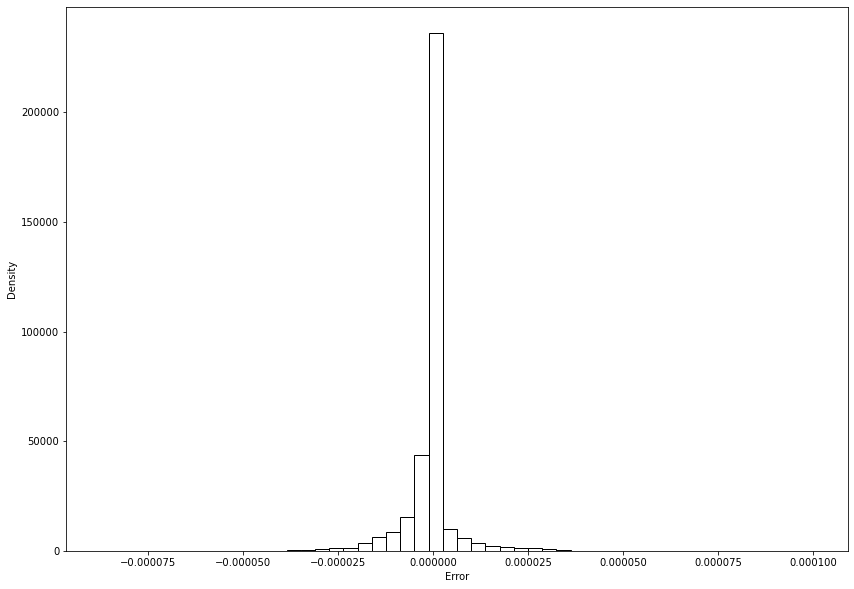

In [28]:
plt.figure(figsize = (14,10))
plt.hist(options_table['Error_of_BS'],bins = 50, edgecolor = 'black', color = 'white')
plt.xlabel('Error')
plt.ylabel('Density')




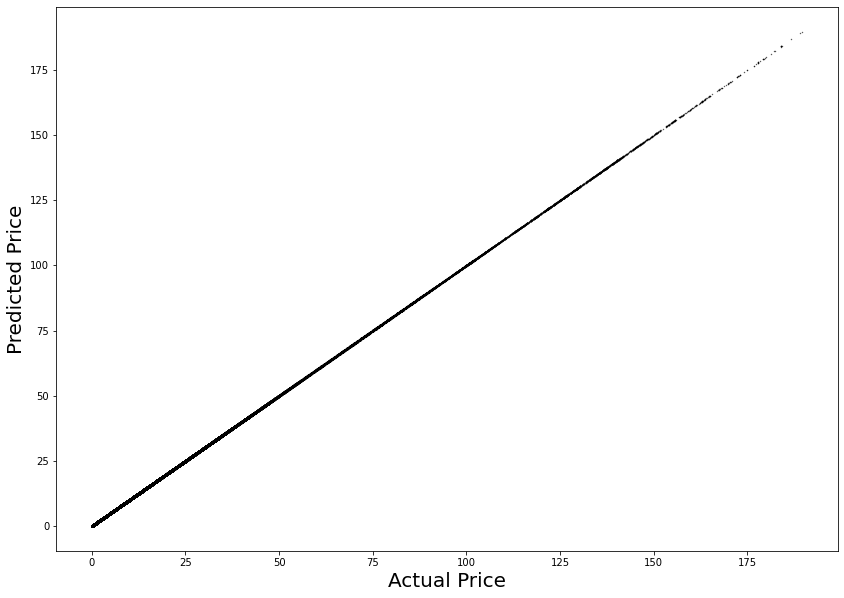

In [30]:
plt.figure(figsize = (14,10))
plt.scatter(options_table['Mid'], options_table['Option_Value'],color='black',linewidth=0.5,alpha=0.5, s= 1 )
plt.xlabel('Actual Price',fontsize=20,fontname='Times New Roman')
plt.ylabel('Predicted Price',fontsize=20,fontname='Times New Roman') 
plt.show()

In [31]:
options_table['Days_to_Expiry'].unique()

array([ 43,  15,  78, 134, 106, 470, 834,   2,  17,  52, 108, 136,  80,
       444, 808,  38,  10,  73, 129, 101, 465, 829,  45, 472, 836,  37,
         9,  72, 128, 100, 464, 828,  44,  16,  79, 135, 107, 471, 835,
        47,  19,  82, 138, 110, 474, 838,  24,  59, 115, 143,  87, 451,
       815])

In [ ]:
mon_43 = options_table[options_table['Days_to_Expiry'] == 43 ]
mon_15 = options_table[options_table['Days_to_Expiry'] == 15 ]
mon_78 = options_table[options_table['Days_to_Expiry'] == 78 ]
mon_134 = options_table[options_table['Days_to_Expiry'] == 134 ]
mon_106 = options_table[options_table['Days_to_Expiry'] == 106 ]
mon_470 = options_table[options_table['Days_to_Expiry'] == 470 ]

fig = plt.figure(figsize = (14,10))
ax = plt.axes()
ax.plot(mon_43['Moneyness'], mon_43['NormalOp'], color = 'black', linewidth = 0.8, marker = '*', markersize = 5, alpha = 0.5)
ax.plot(mon_15['Moneyness'], mon_15['NormalOp'], color = 'blue', linewidth = 0.8, marker = 'o', markersize = 5, alpha = 0.5)
ax.plot(mon_78['Moneyness'], mon_78['NormalOp'], color = 'cyan', linewidth = 0.8, marker = 'p', markersize = 5, alpha = 0.5)
ax.plot(mon_134['Moneyness'], mon_134['NormalOp'], color = 'orange', linewidth = 0.8, marker = 'd', markersize = 5, alpha = 0.5)
ax.plot(mon_106['Moneyness'], mon_106['NormalOp'], color = 'brown', linewidth = 0.8, marker = '8', markersize = 5, alpha = 0.5)
ax.plot(mon_470['Moneyness'], mon_470['NormalOp'], color = 'red', linewidth = 0.8, marker = 'P', markersize = 5, alpha = 0.5)


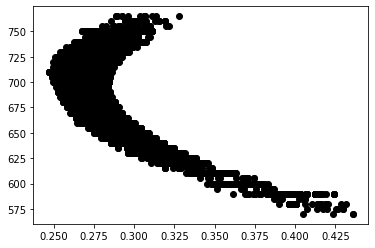

In [32]:
#add plots here
op_43 = options_table[options_table['Days_to_Expiry'] == 15]
plt.scatter(op_43['Imp_Vol'], op_43['OptionStrike'],color='black')


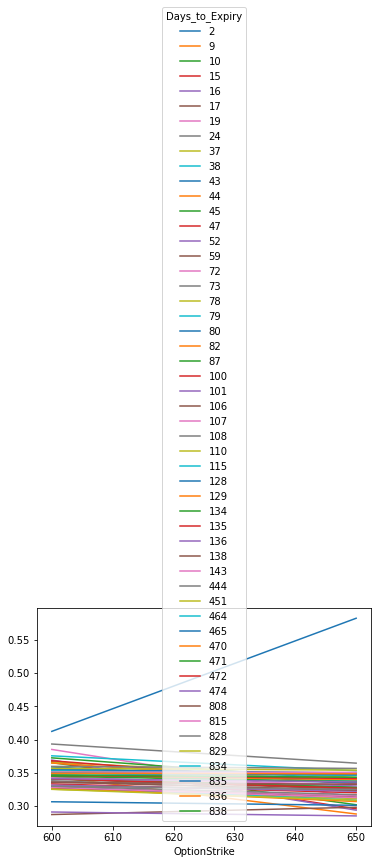

In [33]:

expirations = options_table['Days_to_Expiry'].unique()
iv_multi = options_table[options_table['Days_to_Expiry'].isin(expirations)]
iv_multi.drop_duplicates(inplace = True)
iv_pivoted = iv_multi[['Days_to_Expiry', 'OptionStrike', 'Imp_Vol']].reset_index().pivot_table(index='OptionStrike', columns='Days_to_Expiry', values='Imp_Vol').dropna()
iv_pivoted.plot()

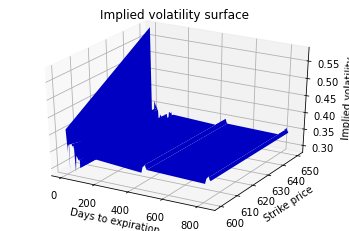

In [37]:
iv_pivoted_surface = iv_multi[['Days_to_Expiry', 'OptionStrike', 'Imp_Vol']].reset_index().pivot_table(index='OptionStrike', columns='Days_to_Expiry', values='Imp_Vol').dropna()
fig = plt.figure()

# add the subplot with projection argument
ax = fig.add_subplot(111, projection='3d')

# get the 1d values from the pivoted dataframe
x, y, z = iv_pivoted_surface.columns.values, iv_pivoted_surface.index.values, iv_pivoted_surface.values

# return coordinate matrices from coordinate vectors
X, Y = np.meshgrid(x, y)
ax.set_xlabel('Days to expiration')
ax.set_ylabel('Strike price')
ax.set_zlabel('Implied volatility')
ax.set_title('Implied volatility surface')

# plot
ax.plot_surface(X, Y, z, rstride=4, cstride=4, color='b')

In [ ]:
options_table_pred = options_table

In [ ]:
n_options_table = options_table[options_table['Days_to_Expiry'] > 106]
n_options_table.head(1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning:

Z contains NaN values. This may result in rendering artifacts.



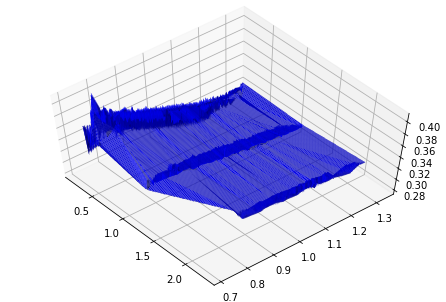

In [39]:
n_options_table = options_table[options_table['Days_to_Expiry'] >= 78]

from scipy.interpolate import griddata
import plotly.graph_objects as go
x = n_options_table['Years_to_Expiry']
y = n_options_table['Moneyness']
z = n_options_table['Imp_Vol']
x = np.array(x)
y = np.array(y)
z = np.array(z)
# x = np.reshape(x, (2, 1136))
# y = np.reshape(y, (2, 1136))
# z = np.reshape(z, (2, 1136))

# fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
# fig.update_layout(title='Mt Bruno Elevation', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))
# fig.show()
# plt.figure(figsize = (14,10))
# ax = plt.axes(projection='3d')
# ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none' )
# ax.set_xlabel('Years to Expiry', fontsize=20)
# ax.set_ylabel('Moneyness', fontsize = 20)
# ax.set_zlabel('Implied Volatility', fontsize=20, rotation = 0)
def make_surf(X,Y,Z):
    XX,YY = np.meshgrid(np.linspace(min(X),max(X),500),np.linspace(min(Y),max(Y),1000))
    ZZ = griddata(np.array([X,Y]).T,np.array(Z),(XX,YY), method='linear')
    return XX,YY,ZZ
make_surf(x,y,z)

def mesh_plot2(X,Y,Z):
    fig = plt.figure()
    ax = Axes3D(fig, azim = -40, elev = 60)
    XX,YY,ZZ = make_surf(X,Y,Z)

    #fig = go.Figure(data=[go.Surface(x=XX, y=YY, z=ZZ)])
    fig = ax.plot_surface(XX, YY, ZZ, rstride=4, cstride=4, color='b')
    return fig

mesh_plot2(x,y,z)


# Neural Network

In [ ]:
options_table['StockLast']

In [40]:
options_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346173 entries, 0 to 532380
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TimeStamp        346173 non-null  object 
 1   Last             346173 non-null  float64
 2   LastSize         346173 non-null  int64  
 3   TotalVolume      346173 non-null  int64  
 4   Bid              346173 non-null  float64
 5   Ask              346173 non-null  float64
 6   TickID           346173 non-null  int64  
 7   BidSize          346173 non-null  int64  
 8   AskSize          346173 non-null  int64  
 9   BasisForLast     346173 non-null  object 
 10  Position         346173 non-null  object 
 11  Option           346173 non-null  object 
 12  OptionType       346173 non-null  object 
 13  ExpirationDate   346173 non-null  object 
 14  DaysToExpire     346173 non-null  int64  
 15  OptionStrike     346173 non-null  int64  
 16  InterestRate     346173 non-null  floa

In [41]:
options_table.dropna(inplace = True)

In [42]:
options_table['StockLast'] = options_table['StockLast']/ options_table['OptionStrike']
options_table['Option_Value'] = options_table['Option_Value']/ options_table['OptionStrike']



In [43]:
options_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346173 entries, 0 to 532380
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TimeStamp        346173 non-null  object 
 1   Last             346173 non-null  float64
 2   LastSize         346173 non-null  int64  
 3   TotalVolume      346173 non-null  int64  
 4   Bid              346173 non-null  float64
 5   Ask              346173 non-null  float64
 6   TickID           346173 non-null  int64  
 7   BidSize          346173 non-null  int64  
 8   AskSize          346173 non-null  int64  
 9   BasisForLast     346173 non-null  object 
 10  Position         346173 non-null  object 
 11  Option           346173 non-null  object 
 12  OptionType       346173 non-null  object 
 13  ExpirationDate   346173 non-null  object 
 14  DaysToExpire     346173 non-null  int64  
 15  OptionStrike     346173 non-null  int64  
 16  InterestRate     346173 non-null  floa

In [44]:
n = len(options_table)
n_t = (int)(0.8 * n)


In [45]:
train = options_table[0:n_t]
X_train = train[['StockLast', 'Years_to_Expiry', 'Risk_free_Rate','Imp_Vol']].values
y_train = train[['Option_Value']].values

In [46]:
test = options_table[n_t+1:n]
X_test = test[['StockLast', 'Years_to_Expiry', 'Risk_free_Rate','Imp_Vol']].values
y_test = test[['Option_Value']].values

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
options_table['StockLast']

0         1.166667
1         1.157825
2         1.157825
3         1.145263
4         1.145632
            ...   
532376    0.821013
532377    0.821693
532378    0.819787
532379    0.799688
532380    0.799688
Name: StockLast, Length: 346173, dtype: float64

In [48]:
y_train

array([[0.17578948],
       [0.16557019],
       [0.16557019],
       ...,
       [0.03339695],
       [0.03347328],
       [0.03347328]])

In [ ]:
X_train.shape[1]

In [ ]:
X_train

In [99]:
def custom_activation(x):
    return backend.exp(x)

nodes = 120
model = Sequential()

model.add(Dense(nodes, input_dim=X_train.shape[1], kernel_initializer = 'glorot_uniform'))
model.add(LeakyReLU())
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='elu'))
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='elu'))
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='elu'))
model.add(Dropout(0.25))

model.add(Dense(1))
model.add(Activation(custom_activation))
          
model.compile(loss='mse',optimizer='adam')
history = model.fit(X_train, y_train, batch_size=128, epochs=500, validation_split=0.3, verbose= 2)

Epoch 1/500
1515/1515 - 8s - loss: 0.0027 - val_loss: 0.0011
Epoch 2/500
1515/1515 - 8s - loss: 7.1623e-04 - val_loss: 5.5471e-05
Epoch 3/500
1515/1515 - 8s - loss: 2.0825e-04 - val_loss: 1.5237e-05
Epoch 4/500
1515/1515 - 8s - loss: 1.3721e-04 - val_loss: 2.1705e-05
Epoch 5/500
1515/1515 - 8s - loss: 1.0621e-04 - val_loss: 1.9012e-05
Epoch 6/500
1515/1515 - 8s - loss: 8.6892e-05 - val_loss: 5.2843e-06
Epoch 7/500
1515/1515 - 8s - loss: 8.8923e-05 - val_loss: 1.7122e-05
Epoch 8/500
1515/1515 - 7s - loss: 6.7073e-05 - val_loss: 1.6639e-05
Epoch 9/500
1515/1515 - 8s - loss: 6.1292e-05 - val_loss: 1.7314e-05
Epoch 10/500
1515/1515 - 7s - loss: 5.1447e-05 - val_loss: 1.6007e-05
Epoch 11/500
1515/1515 - 8s - loss: 4.4707e-05 - val_loss: 7.0746e-06
Epoch 12/500
1515/1515 - 8s - loss: 3.9902e-05 - val_loss: 1.0176e-05
Epoch 13/500
1515/1515 - 8s - loss: 3.5014e-05 - val_loss: 8.5327e-06
Epoch 14/500
1515/1515 - 7s - loss: 3.1925e-05 - val_loss: 6.2753e-06
Epoch 15/500
1515/1515 - 8s - loss: 3

1515/1515 - 7s - loss: 1.7399e-05 - val_loss: 6.2091e-06
Epoch 119/500
1515/1515 - 8s - loss: 3.1726e-05 - val_loss: 2.0760e-05
Epoch 120/500
1515/1515 - 8s - loss: 3.0334e-05 - val_loss: 3.2441e-05
Epoch 121/500
1515/1515 - 8s - loss: 2.2391e-05 - val_loss: 8.5059e-06
Epoch 122/500
1515/1515 - 8s - loss: 2.9922e-05 - val_loss: 1.5494e-05
Epoch 123/500
1515/1515 - 8s - loss: 2.0242e-05 - val_loss: 8.5044e-06
Epoch 124/500
1515/1515 - 7s - loss: 1.9906e-05 - val_loss: 1.8597e-05
Epoch 125/500
1515/1515 - 7s - loss: 2.1719e-05 - val_loss: 1.0539e-05
Epoch 126/500
1515/1515 - 7s - loss: 1.8579e-05 - val_loss: 1.0771e-05
Epoch 127/500
1515/1515 - 7s - loss: 1.9705e-05 - val_loss: 3.3176e-06
Epoch 128/500
1515/1515 - 8s - loss: 1.8545e-05 - val_loss: 9.7360e-06
Epoch 129/500
1515/1515 - 8s - loss: 1.9183e-05 - val_loss: 6.3719e-06
Epoch 130/500
1515/1515 - 8s - loss: 2.1871e-05 - val_loss: 1.6473e-05
Epoch 131/500
1515/1515 - 7s - loss: 2.0260e-05 - val_loss: 3.8090e-06
Epoch 132/500
1515/1

Epoch 234/500
1515/1515 - 8s - loss: 2.0167e-05 - val_loss: 3.4935e-05
Epoch 235/500
1515/1515 - 7s - loss: 2.1723e-05 - val_loss: 2.5171e-05
Epoch 236/500
1515/1515 - 8s - loss: 2.1331e-05 - val_loss: 3.5850e-05
Epoch 237/500
1515/1515 - 8s - loss: 2.0334e-05 - val_loss: 2.1362e-05
Epoch 238/500
1515/1515 - 7s - loss: 2.0656e-05 - val_loss: 4.2056e-05
Epoch 239/500
1515/1515 - 8s - loss: 2.0752e-05 - val_loss: 1.7143e-05
Epoch 240/500
1515/1515 - 8s - loss: 1.9336e-05 - val_loss: 3.0642e-05
Epoch 241/500
1515/1515 - 8s - loss: 2.0734e-05 - val_loss: 7.5916e-06
Epoch 242/500
1515/1515 - 7s - loss: 1.9789e-05 - val_loss: 3.8978e-05
Epoch 243/500
1515/1515 - 8s - loss: 1.9212e-05 - val_loss: 2.1617e-05
Epoch 244/500
1515/1515 - 7s - loss: 1.8913e-05 - val_loss: 1.9857e-05
Epoch 245/500
1515/1515 - 7s - loss: 2.4743e-05 - val_loss: 3.9953e-05
Epoch 246/500
1515/1515 - 7s - loss: 2.2325e-05 - val_loss: 3.2053e-05
Epoch 247/500
1515/1515 - 7s - loss: 1.9675e-05 - val_loss: 2.2690e-05
Epoch 

Epoch 350/500
1515/1515 - 7s - loss: 2.0737e-05 - val_loss: 1.4087e-05
Epoch 351/500
1515/1515 - 7s - loss: 2.0111e-05 - val_loss: 2.3175e-05
Epoch 352/500
1515/1515 - 7s - loss: 1.8961e-05 - val_loss: 1.7016e-05
Epoch 353/500
1515/1515 - 7s - loss: 1.7980e-05 - val_loss: 8.6483e-06
Epoch 354/500
1515/1515 - 7s - loss: 1.8839e-05 - val_loss: 4.9219e-06
Epoch 355/500
1515/1515 - 7s - loss: 1.9805e-05 - val_loss: 2.3357e-05
Epoch 356/500
1515/1515 - 7s - loss: 1.7485e-05 - val_loss: 3.0838e-05
Epoch 357/500
1515/1515 - 7s - loss: 1.9229e-05 - val_loss: 1.7701e-05
Epoch 358/500
1515/1515 - 7s - loss: 1.7796e-05 - val_loss: 2.3334e-05
Epoch 359/500
1515/1515 - 7s - loss: 1.9253e-05 - val_loss: 1.2372e-05
Epoch 360/500
1515/1515 - 7s - loss: 1.8066e-05 - val_loss: 1.9308e-05
Epoch 361/500
1515/1515 - 7s - loss: 1.7069e-05 - val_loss: 1.9172e-05
Epoch 362/500
1515/1515 - 8s - loss: 1.8447e-05 - val_loss: 1.2382e-05
Epoch 363/500
1515/1515 - 7s - loss: 1.7348e-05 - val_loss: 2.7693e-05
Epoch 

Epoch 466/500
1515/1515 - 7s - loss: 2.1075e-05 - val_loss: 5.4893e-05
Epoch 467/500
1515/1515 - 7s - loss: 2.1001e-05 - val_loss: 3.3814e-05
Epoch 468/500
1515/1515 - 7s - loss: 1.9691e-05 - val_loss: 5.6039e-05
Epoch 469/500
1515/1515 - 7s - loss: 1.8404e-05 - val_loss: 4.2067e-05
Epoch 470/500
1515/1515 - 7s - loss: 2.0073e-05 - val_loss: 2.2462e-05
Epoch 471/500
1515/1515 - 8s - loss: 1.9597e-05 - val_loss: 3.6507e-05
Epoch 472/500
1515/1515 - 8s - loss: 1.9757e-05 - val_loss: 5.2353e-05
Epoch 473/500
1515/1515 - 8s - loss: 1.9555e-05 - val_loss: 6.3779e-05
Epoch 474/500
1515/1515 - 8s - loss: 1.9170e-05 - val_loss: 5.5476e-05
Epoch 475/500
1515/1515 - 9s - loss: 2.3945e-05 - val_loss: 4.0041e-05
Epoch 476/500
1515/1515 - 7s - loss: 1.9786e-05 - val_loss: 5.4085e-05
Epoch 477/500
1515/1515 - 7s - loss: 1.9665e-05 - val_loss: 5.7265e-05
Epoch 478/500
1515/1515 - 7s - loss: 2.0715e-05 - val_loss: 4.9657e-05
Epoch 479/500
1515/1515 - 7s - loss: 2.0749e-05 - val_loss: 4.9299e-05
Epoch 

In [100]:
model.save('options_500.h5')

dict_keys(['loss', 'val_loss'])


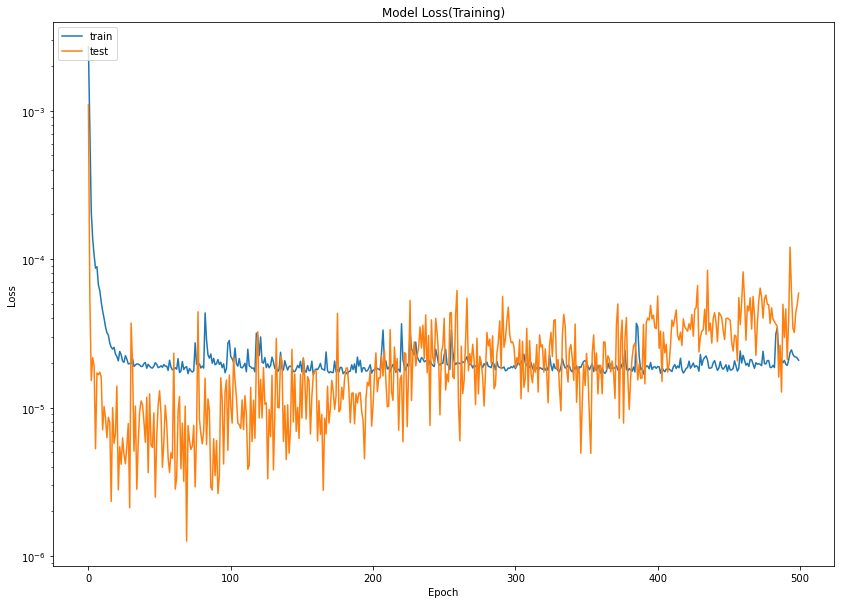

In [101]:
print(history.history.keys())
plt.figure(figsize = (14,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale('log')
plt.title('Model Loss(Training)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

In [102]:
predictions = model.predict(X_train)

In [107]:
y_train
np.count_nonzero(~np.isnan(predictions))

276938

In [70]:

predictions.flatten()

array([0.18233693, 0.16380337, 0.16380337, ..., 0.034503  , 0.03456702,
       0.03456702], dtype=float32)

In [ ]:
y_train

Text(0, 0.5, 'Predicted Price')

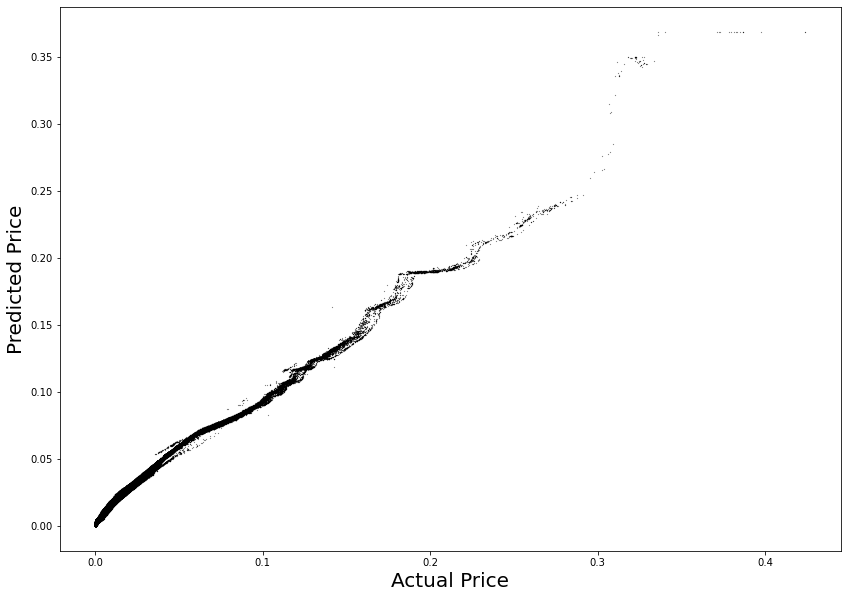

In [114]:

plt.figure(figsize=(14,10))
plt.scatter(y_train , predictions, color='black',linewidth=0.3,alpha = 0.4, s = 0.9)

plt.xlabel('Actual Price',fontsize=20)
plt.ylabel('Predicted Price',fontsize=20)



Text(0, 0.5, 'Predicted Price')

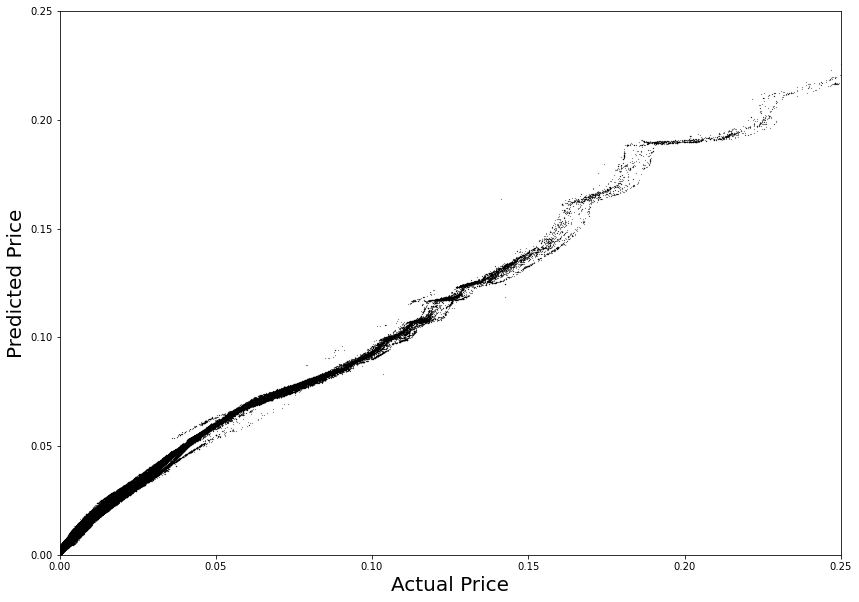

In [118]:

plt.figure(figsize=(14,10))
plt.scatter(y_train , predictions, color='black',linewidth=0.3,alpha = 0.4, s = 0.9)
plt.xlim(0, 0.25)
plt.ylim(0, 0.25)

plt.xlabel('Actual Price',fontsize=20)
plt.ylabel('Predicted Price',fontsize=20)


In [119]:
predictions = predictions.flatten()


In [120]:
y_train = y_train.flatten()

In [121]:
q = pd.DataFrame()
q['difference'] = y_train - predictions
q['mse'] = mean(q['difference']**2)
print("Mean Squared Error:  ",q['mse'].mean())
q['mae'] = mean(abs(q['difference']))
print("Mean Absolute Error:  ",q['mae'].mean())

Mean Squared Error:   5.24339663888028e-05
Mean Absolute Error:   0.006649240592184252


# Using the testing dataset

In [122]:
y_test = y_test.flatten()

In [123]:
y_test_final = model.predict(X_test)
y_test_final = y_test_final.flatten()
t = pd.DataFrame()
t['difference'] = y_test - y_test_final
t['mse'] = mean(t['difference']**2)
print("Mean Squared Error:  ",t['mse'].mean())
t['mae'] = mean(abs(t['difference']))
print("Mean Absolute Error:  ",t['mae'].mean())


Mean Squared Error:   5.674758088545321e-05
Mean Absolute Error:   0.006534859977822059


(0.0, 0.25)

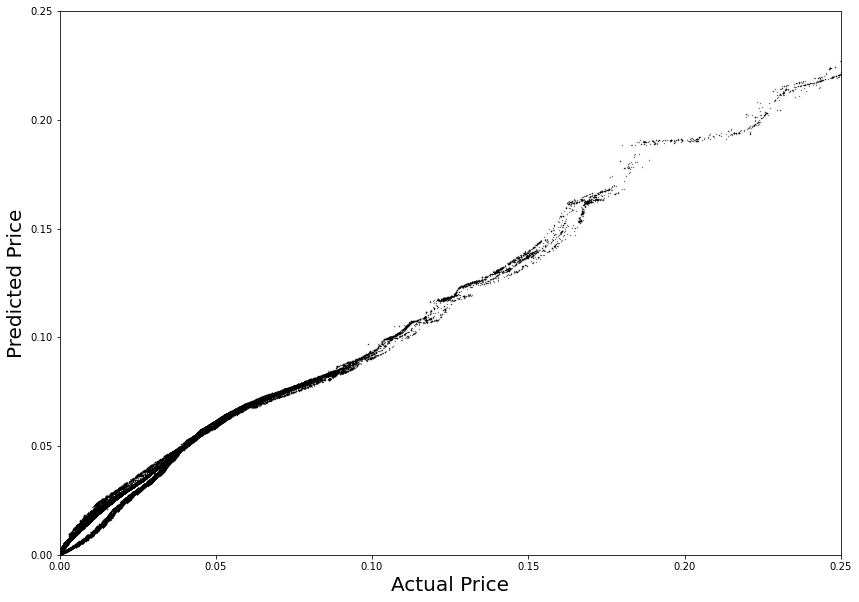

In [125]:
plt.figure(figsize=(14,10))
plt.scatter(y_test, y_test_final, color='black',linewidth=0.5,alpha = 0.4, s = 1)
plt.xlabel('Actual Price',fontsize=20)

plt.ylabel('Predicted Price',fontsize=20)

plt.xlim(0, 0.25)
plt.ylim(0, 0.25)

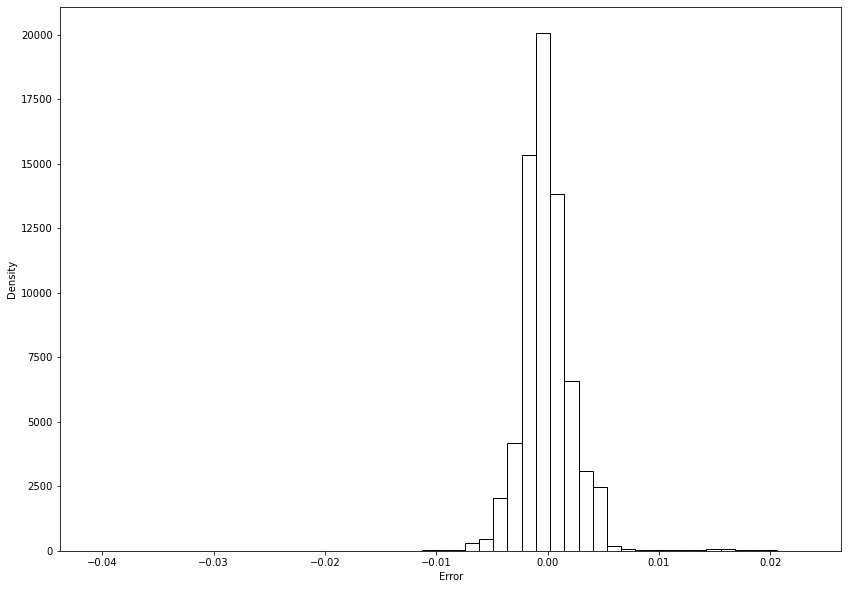

In [78]:
plt.figure(figsize=(14,10))
plt.hist(y_test - y_test_final, bins=50,edgecolor='black',color='white')
plt.xlabel('Error')
plt.ylabel('Density')
plt.show()

In [80]:
newop = options_table.copy()

In [81]:
options_table_pre = options_table[['StockLast', 'Years_to_Expiry', 'Risk_free_Rate','Imp_Vol']]

In [82]:
options_table.head()

,TimeStamp,Last,LastSize,TotalVolume,Bid,Ask,TickID,BidSize,AskSize,BasisForLast,...,Error_of_BS,Delta,Vega,Theta,Moneyness,Log_Moneyness,Gamma,Rho,NormalOp,Std_Moneyness
0,2012-10-05-09:30:02,101.15,1,1,99.25,101.15,41080,0,0,C,...,-3.371887e-06,0.887707,0.433567,-0.200083,0.857143,0.154151,0.002135,0.572092,0.175789,1.146702
1,2012-10-05-11:23:58,95.15,9,10,93.60,95.15,102817472,0,0,C,...,-7.428059e-06,0.893887,0.412749,-0.175693,0.863689,0.146543,0.002245,0.577355,0.165570,1.185084
2,2012-10-05-11:23:58,95.15,9,19,93.60,95.15,102817505,0,0,C,...,-7.428059e-06,0.893887,0.412749,-0.175693,0.863689,0.146543,0.002245,0.577355,0.165570,1.185084
3,2012-10-05-12:09:51,89.28,7,26,88.95,89.75,135660543,0,0,C,...,-1.460998e-07,0.861237,0.492777,-0.226080,0.873162,0.135634,0.002546,0.550508,0.156754,1.018817
4,2012-10-05-12:09:52,89.29,3,29,89.00,89.55,135679625,0,0,C,...,-2.254739e-07,0.864624,0.484684,-0.219379,0.872881,0.135956,0.002536,0.553381,0.156623,1.035141


In [83]:
options_table_pre['Actual_Stock_last'] = options_table_pre['StockLast']* options_table['OptionStrike']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
options_table_pre

,StockLast,Years_to_Expiry,Risk_free_Rate,Imp_Vol,Actual_Stock_last
0,1.166667,0.116724,0.000587,0.393474,665.00
1,1.157825,0.116507,0.000587,0.362276,659.96
2,1.157825,0.116507,0.000587,0.362276,659.96
3,1.145263,0.116420,0.000587,0.390176,652.80
4,1.145632,0.116420,0.000587,0.384934,653.01
...,...,...,...,...,...
532376,0.821013,2.231584,0.001141,0.343683,615.76
532377,0.821693,2.231396,0.001141,0.346288,616.27
532378,0.819787,2.231075,0.001141,0.341561,614.84
532379,0.799688,2.231584,0.001141,0.342561,615.76


In [86]:
options_table['PredictedOP'] = model.predict(options_table[['StockLast', 'Years_to_Expiry', 'Risk_free_Rate','Imp_Vol']])

In [ ]:
options_table_pred

In [87]:
options_table['Normal_op_act'] = options_table['NormalOp']* options_table['OptionStrike']
options_table['Predicted_op_act'] = options_table['PredictedOP']* options_table['OptionStrike']


In [88]:
days = options_table['Days_to_Expiry'].unique()
days

array([ 43,  15,  78, 134, 106, 470, 834,   2,  17,  52, 108, 136,  80,
       444, 808,  38,  10,  73, 129, 101, 465, 829,  45, 472, 836,  37,
         9,  72, 128, 100, 464, 828,  44,  16,  79, 135, 107, 471, 835,
        47,  19,  82, 138, 110, 474, 838,  24,  59, 115, 143,  87, 451,
       815])

In [96]:
pred43 = options_table[options_table['Days_to_Expiry'] == 10]

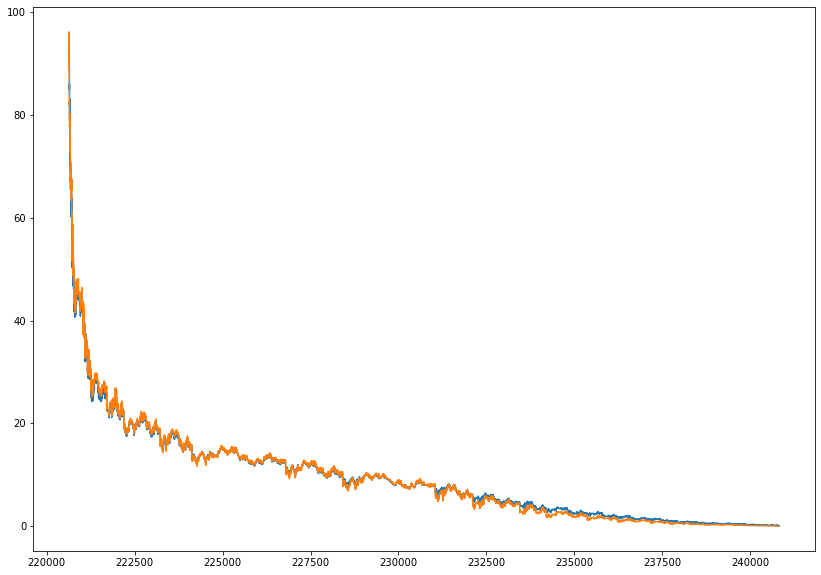

In [97]:
plt.figure(figsize = (14,10))
ax = plt.axes()
ax.plot(pred43['Normal_op_act'])
ax.plot(pred43['Predicted_op_act'])

In [98]:
model.save('options_100.h5')

In [ ]:
#heston modelling

strike_price = 110.0
payoff = ql.PlainVanillaPayoff(ql.Option.Call, strike_price)
# option data
maturity_date = ql.Date(15, 1, 2016)
spot_price = 127.62
strike_price = 130
volatility = 0.20 # the historical vols for a year
dividend_rate =  0
option_type = ql.Option.Call

risk_free_rate = 0.001
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates()

calculation_date = ql.Date(8, 5, 2015)
ql.Settings.instance().evaluationDate = calculation_date

payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, exercise)

v0 = volatility*volatility  # spot variance
kappa = 0.1
theta = v0
sigma = 0.1
rho = -0.75

spot_handle = ql.QuoteHandle(
    ql.SimpleQuote(spot_price)
)
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, day_count)
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, day_count)
)
heston_process = ql.HestonProcess(flat_ts,
                                  dividend_yield,
                                  spot_handle,
                                  v0,
                                  kappa,
                                  theta,
                                  sigma,
                                  rho)
engine = ql.AnalyticHestonEngine(ql.HestonModel(heston_process),0.01, 1000)
european_option.setPricingEngine(engine)
h_price = european_option.NPV()
print("The Heston model price is",h_price)
print(spot_handle)